In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%pip install tueplots
from tueplots import bundles
%pip install seaborn
import seaborn as sns


Note: you may need to restart the kernel to use updated packages.


In [6]:
results_2019 = pd.read_csv("../data/bac-results-2019.csv", index_col=0)
results_2020 = pd.read_csv("../data/bac-results-2020.csv", index_col=0)
results_2021 = pd.read_csv("../data/bac-results-2021.csv", index_col=0)

# convert to numeric what is possible
results_2019 = results_2019.apply(pd.to_numeric, errors='coerce').fillna(results_2019)
results_2020 = results_2020.apply(pd.to_numeric, errors='coerce').fillna(results_2020)
results_2021 = results_2021.apply(pd.to_numeric, errors='coerce').fillna(results_2021)

# replace NaNs with empty strings for easier searchability
results_2019.fillna('', inplace=True)
results_2020.fillna('', inplace=True)
results_2021.fillna('', inplace=True)

C:\Users\cseke\anaconda3\envs\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


[0.79363081 0.02001105]


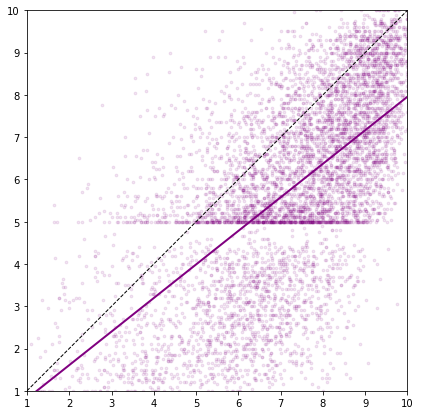

In [28]:
# Let's plot the minorities' Romanian grades and the average of their electory and mandatory subjects.
# Predict the Romanian grade from that average.

# Separate the minorities. Create column for average.
romanian_plus_results = results_2021[(results_2021['mother_tongue'] != '') & (results_2021['romanian_written_final'] >= 1)]
romanian_plus_results_valid = romanian_plus_results[(romanian_plus_results['mandatory_subject_written_final'] >= 1.0) & (romanian_plus_results['elective_subject_written_final'] >= 1.0)].copy()
romanian_plus_results_valid.loc[:, 'mandatory_elective_average'] = romanian_plus_results_valid[['mandatory_subject_written_final', 'elective_subject_written_final']].mean(axis=1)

dot_size_minority = 30
dot_size_ro = dot_size_minority * len(romanian_plus_results_valid)

x_minority = romanian_plus_results_valid['mandatory_elective_average']
y_minority = romanian_plus_results_valid['romanian_written_final']

linear_line_minority = np.polyfit(x_minority, y_minority, 1)
print(linear_line_minority)
end_points_x = [1, 10]
end_points_y = [linear_line_minority[0] * x + linear_line_minority[1] for x in end_points_x]

plt.figure(figsize=(7, 7))
plt.scatter(x_minority, y_minority, marker='.', alpha=0.1, color='purple', s=dot_size_minority)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(1, 10)
plt.ylim(1, 10)
plt.plot(end_points_x, end_points_y, linewidth = 2, color='purple')
plt.plot(end_points_x, end_points_x, '--', linewidth = 1, color='black')
plt.show()

[0.79363081 0.02001105]


C:\Users\cseke\anaconda3\envs\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


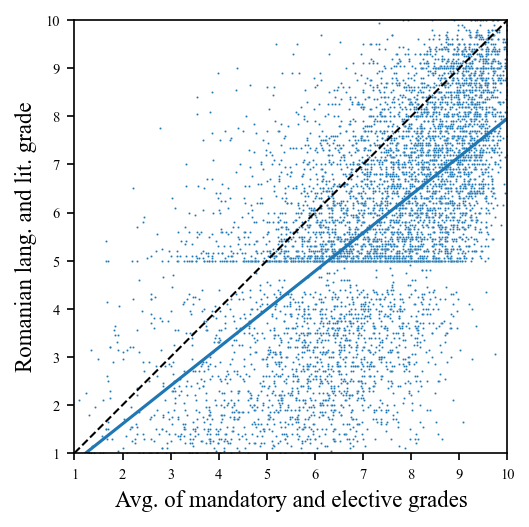

In [93]:
# Let's plot the minorities' Romanian grades and the average of their electory and mandatory subjects.
# Predict the Romanian grade from that average.

# Separate the minorities. Create column for average.
romanian_plus_results = results_2021[(results_2021['mother_tongue'] != '') & (results_2021['romanian_written_final'] >= 1)]
romanian_plus_results_valid = romanian_plus_results[(romanian_plus_results['mandatory_subject_written_final'] >= 1.0) & (romanian_plus_results['elective_subject_written_final'] >= 1.0)].copy()
romanian_plus_results_valid.loc[:, 'mandatory_elective_average'] = romanian_plus_results_valid[['mandatory_subject_written_final', 'elective_subject_written_final']].mean(axis=1)

dot_size_minority = 30
dot_size_ro = dot_size_minority * len(romanian_plus_results_valid)

x_minority = romanian_plus_results_valid['mandatory_elective_average']
y_minority = romanian_plus_results_valid['romanian_written_final']

linear_line_minority = np.polyfit(x_minority, y_minority, 1)
print(linear_line_minority)
end_points_x = [1, 10]
end_points_y = [linear_line_minority[0] * x + linear_line_minority[1] for x in end_points_x]


with plt.rc_context(bundles.neurips2021(usetex=False, family='serif')):
    fig, ax = plt.subplots(dpi=150)

    sns.scatterplot(x_minority, y_minority, ax=ax, markers=['.'], s=1
    #, marker='.', alpha=0.25, color='mediumpurple', s=3
    )
    
    plt.gca().set_aspect('equal', adjustable='box')
    ax.set_xlim(1, 10)
    ax.set_ylim(1, 10)
    ax.plot(end_points_x, end_points_y, linewidth = 1.5)
    ax.plot(end_points_x, end_points_x, '--', linewidth = 1, color='black')

    ax.set_xlabel("Avg. of mandatory and elective grades", fontsize=11)
    ax.set_ylabel("Romanian lang. and lit. grade", fontsize=11)

    plt.show()
    fig.savefig('../doc/plots/exp3_linear_reg_min.png', bbox_inches='tight')


[0.79363081 0.02001105]


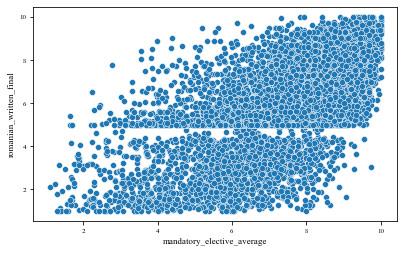

AttributeError: 'AxesSubplot' object has no attribute 'savefig'

In [86]:
# Let's plot the minorities' Romanian grades and the average of their electory and mandatory subjects.
# Predict the Romanian grade from that average.

# Separate the minorities. Create column for average.
romanian_plus_results = results_2021[(results_2021['mother_tongue'] != '') & (results_2021['romanian_written_final'] >= 1)]
romanian_plus_results_valid = romanian_plus_results[(romanian_plus_results['mandatory_subject_written_final'] >= 1.0) & (romanian_plus_results['elective_subject_written_final'] >= 1.0)].copy()
romanian_plus_results_valid.loc[:, 'mandatory_elective_average'] = romanian_plus_results_valid[['mandatory_subject_written_final', 'elective_subject_written_final']].mean(axis=1)

dot_size_minority = 30
dot_size_ro = dot_size_minority * len(romanian_plus_results_valid)

x_minority = romanian_plus_results_valid['mandatory_elective_average']
y_minority = romanian_plus_results_valid['romanian_written_final']

linear_line_minority = np.polyfit(x_minority, y_minority, 1)
print(linear_line_minority)
end_points_x = [1, 10]
end_points_y = [linear_line_minority[0] * x + linear_line_minority[1] for x in end_points_x]


with plt.rc_context(bundles.neurips2021(usetex=False, family='serif')):

    g = sns.scatterplot(x = x_minority, y = y_minority)
    #g2 = sns.regplot(x = x_minority, y = y_minority, ax=g.ax, scatter=False)
 
    
    #g.ax_joint.plot(end_points_x, end_points_x, '--', linewidth = 1, color='black')

    #g.ax_joint.set_xlabel("Avg. of mandatory and elective grades", fontsize=13)
    #g.ax_joint.set_ylabel("Romanian lang. and lit. grade", fontsize=13)

    plt.show()
    #g.savefig('../doc/plots/exp3_linear_reg_min.png', bbox_inches='tight')

    

[0.65135129 2.5625817 ]


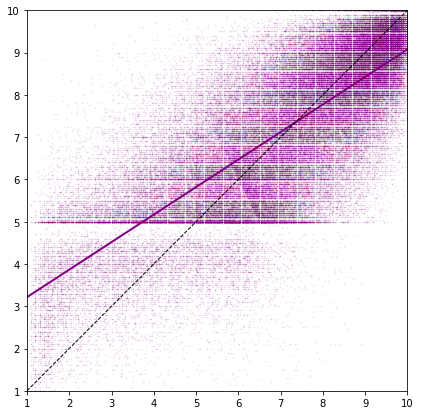

In [29]:
# Same for the Romanian students.

romanian_only_results = results_2021[(results_2021['mother_tongue'] == '') & (results_2021['romanian_written_final'] >= 1)]
romanian_only_results_valid = romanian_only_results[(romanian_only_results['mandatory_subject_written_final'] >= 1.0) & (romanian_only_results['elective_subject_written_final'] >= 1.0)].copy()
romanian_only_results_valid.loc[:, 'mandatory_elective_average'] = romanian_only_results_valid[['mandatory_subject_written_final', 'elective_subject_written_final']].mean(axis=1)

dot_size_ro /= len(romanian_only_results_valid)

x_ro = romanian_only_results_valid['mandatory_elective_average']
y_ro = romanian_only_results_valid['romanian_written_final']

linear_line_ro = np.polyfit(x_ro, y_ro, 1)
print(linear_line_ro)
end_points_x = [1, 10]
end_points_y = [linear_line_ro[0] * x + linear_line_ro[1] for x in end_points_x]

plt.figure(figsize=(7, 7))
plt.scatter(x_ro, y_ro, marker='.', alpha=0.1, color='purple', s=dot_size_ro)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(1, 10)
plt.ylim(1, 10)
plt.plot(end_points_x, end_points_y, linewidth = 2, color='purple')
plt.plot(end_points_x, end_points_x, '--', linewidth = 1, color='black')
plt.show()

[0.65135129 2.5625817 ]


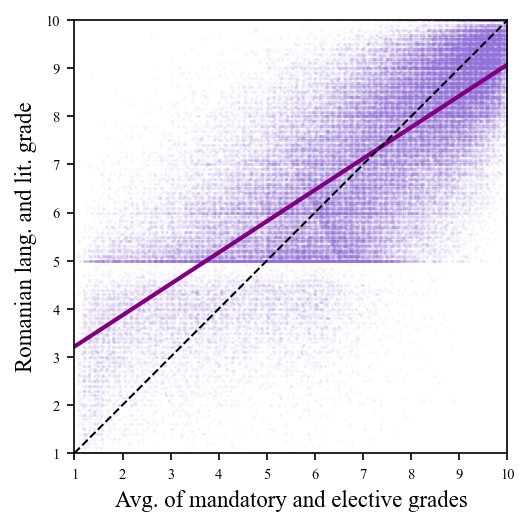

In [28]:
# Same for the Romanian students.

romanian_only_results = results_2021[(results_2021['mother_tongue'] == '') & (results_2021['romanian_written_final'] >= 1)]
romanian_only_results_valid = romanian_only_results[(romanian_only_results['mandatory_subject_written_final'] >= 1.0) & (romanian_only_results['elective_subject_written_final'] >= 1.0)].copy()
romanian_only_results_valid.loc[:, 'mandatory_elective_average'] = romanian_only_results_valid[['mandatory_subject_written_final', 'elective_subject_written_final']].mean(axis=1)

dot_size_ro /= len(romanian_only_results_valid)

x_ro = romanian_only_results_valid['mandatory_elective_average']
y_ro = romanian_only_results_valid['romanian_written_final']

linear_line_ro = np.polyfit(x_ro, y_ro, 1)
print(linear_line_ro)
end_points_x = [1, 10]
end_points_y = [linear_line_ro[0] * x + linear_line_ro[1] for x in end_points_x]

with plt.rc_context(bundles.neurips2021(usetex=False, family='serif')):
    fig, ax = plt.subplots(dpi=150)

    ax.scatter(x_ro, y_ro, marker='.', alpha=0.05, color='mediumpurple', s=1)
    #ax.hexbin(x_ro, y_ro, gridsize=18, cmap='Purples')

    plt.gca().set_aspect('equal', adjustable='box')
    ax.set_xlim(1, 10)
    ax.set_ylim(1, 10)
    ax.plot(end_points_x, end_points_y, linewidth = 2, color='purple')
    ax.plot(end_points_x, end_points_x, '--', linewidth = 1, color='black')

    ax.set_xlabel("Avg. of mandatory and elective grades", fontsize=11)
    ax.set_ylabel("Romanian lang. and lit. grade", fontsize=11)

    plt.show()
    fig.savefig('../doc/plots/exp3_linear_reg_rom.png', bbox_inches='tight')

# with plt.rc_context(bundles.neurips2021(usetex=False, family='serif')):

#     g = sns.jointplot(x = x_ro, y = y_ro, kind = 'hex', joint_kws=dict(gridsize=36))
#     sns.regplot(x = x_ro, y = y_ro, ax=g.ax_joint, scatter=False)
    
#     g.ax_marg_x.set_axis_off()
#     g.ax_marg_y.set_axis_off()
#     g.ax_joint.plot(end_points_x, end_points_x, '--', linewidth = 1, color='black')

#     g.ax_joint.set_xlabel("Avg. of mandatory and elective grades", fontsize=13)
#     g.ax_joint.set_ylabel("Romanian lang. and lit. grade", fontsize=13)

#     plt.show()
#     g.savefig('../doc/plots/exp3_linear_reg_rom.png', bbox_inches='tight')

[ 0.85281201 -0.66624745]


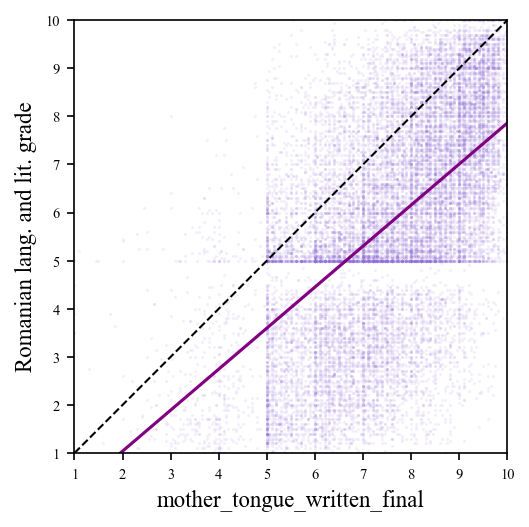

In [43]:
# Let's plot the minorities' Romanian grades vs their mother tongue lang. and lit. exam grade.
# Predict the Romanian grade from that average.


# remove invalid rows from the 2019 data (grade cell contains "DISQUALIFIED" etc. strings)
results_2019_2 = results_2019[results_2019[['romanian_written_final', 'mother_tongue_written_final']].applymap(lambda x: np.isreal(x) or x == '').all(1)]

# combine the three years
results_all = pd.concat([results_2019_2, results_2020, results_2021], ignore_index=True, sort=False)

results_all.replace('', np.nan, inplace=True)

# Separate the minorities. Create column for average.
romanian_plus_results = results_all[(results_all['mother_tongue'] != '') & (results_all['romanian_written_final'] >= 1) & (results_all['mother_tongue_written_final'] >= 1)]

dot_size_minority = 30
dot_size_ro = dot_size_minority * len(romanian_plus_results)

x_minority = romanian_plus_results['mother_tongue_written_final']
y_minority = romanian_plus_results['romanian_written_final']

linear_line_minority = np.polyfit(x_minority, y_minority, 1)
print(linear_line_minority)
end_points_x = [1, 10]
end_points_y = [linear_line_minority[0] * x + linear_line_minority[1] for x in end_points_x]


with plt.rc_context(bundles.neurips2021(usetex=False, family='serif')):
    fig, ax = plt.subplots(dpi=150)

    ax.scatter(x_minority, y_minority, marker='.', alpha=0.1, color='mediumpurple', s=1)
    #ax.hexbin(x_minority, y_minority, gridsize=36, bins='log', cmap='Purples')
    #  marker='.', alpha=0.25, color='mediumpurple', s=3)
    
    plt.gca().set_aspect('equal', adjustable='box')
    ax.set_xlim(1, 10)
    ax.set_ylim(1, 10)
    ax.plot(end_points_x, end_points_y, linewidth = 1.5, color='purple')
    ax.plot(end_points_x, end_points_x, '--', linewidth = 1, color='black')

    ax.set_xlabel("mother_tongue_written_final", fontsize=11)
    ax.set_ylabel("Romanian lang. and lit. grade", fontsize=11)

    plt.show()
    fig.savefig('../doc/plots/exp3_linear_reg_minorities.png', bbox_inches='tight')